Team members:

- José Ricardo Munguía Marín A01795660
- Alberto Campos Hernandez A01795645
- Martin Acevedo Pacheco A01794756
- Luis Alejandro Juarez Rodriguez A01795463
- David Alejandro Gutiérrez Valencia A01027771


## TC 5033
### Word Embeddings

<br>

#### Activity 3b: Text Classification using RNNs and AG_NEWS dataset in PyTorch
<br>

- Objective:
    - Understand the basics of Recurrent Neural Networks (RNNs) and their application in text classification.
    - Learn how to handle a real-world text dataset, AG_NEWS, in PyTorch.
    - Gain hands-on experience in defining, training, and evaluating a text classification model in PyTorch.
    
<br>

- Instructions:
    - Data Preparation: Starter code will be provided that loads the AG_NEWS dataset and prepares it for training. Do not modify this part. However, you should be sure to understand it, and comment it, the use of markdown cells is suggested.

    - Model Setup: A skeleton code for the RNN model class will be provided. Complete this class and use it to instantiate your model.

    - Implementing Accuracy Function: Write a function that takes model predictions and ground truth labels as input and returns the model's accuracy.

    - Training Function: Implement a function that performs training on the given model using the AG_NEWS dataset. Your model should achieve an accuracy of at least 80% to get full marks for this part.

    - Text Sampling: Write a function that takes a sample text as input and classifies it using your trained model.

    - Confusion Matrix: Implement a function to display the confusion matrix for your model on the test data.

    - Submission: Submit your completed Jupyter Notebook. Make sure to include a markdown cell at the beginning of the notebook that lists the names of all team members. Teams should consist of 3 to 4 members.
    
<br>

- Evaluation Criteria:

    - Correct setup of all the required libraries and modules (10%)
    - Code Quality (30%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity. Comments should be given for all the provided code, this will help you understand its functionality.
    
   - Functionality (60%):
        - All the functions should execute without errors and provide the expected outputs.
        - RNN model class (20%)
        - Accuracy fucntion (10%)
        - Training function (10%)
        - Sampling function (10%)
        - Confucion matrix (10%)

        - The model should achieve at least an 80% accuracy on the AG_NEWS test set for full marks in this criterion.


Dataset

https://pytorch.org/text/stable/datasets.html#text-classification

https://paperswithcode.com/dataset/ag-news


#### Install libraries (if needed)

You may need to install the following libraries to ensure version compatibility. After installing them, please Restart the Session (Runtime -> Restart Session)

In [ ]:
# !pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.

In [ ]:
# !pip install scipy==1.9.3
# !pip install scikit-plot
#you may receive a message of restarting session, this is OK

In [ ]:
# !pip install portalocker
#please restar session after this intallation. After restarting go straight to importing the libraries

## Import libraries

In [3]:
# The following libraries are required for running the given code
# Please feel free to add any libraries you consider adecuate to complete the assingment.
import numpy as np
#PyTorch libraries
import torch
from torchtext.datasets import AG_NEWS
# Dataloader library
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
# Libraries to prepare the data
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
# neural layers
from torch import nn
from torch.nn import functional as F

# These libraries are suggested to plot confusion matrix
# you may use others
import scikitplot as skplt
import gc

In [4]:
# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Get the train and the test datasets and dataloaders

Classes:

* 1 - World

* 2 - Sports

* 3 - Business

* 4 - Sci/Tech

We will convert them to:

* 0 - World

* 1 - Sports

* 2 - Business

* 3 - Sci/Tech

In [5]:
train_dataset, test_dataset = AG_NEWS()
train_dataset, test_dataset = to_map_style_dataset(train_dataset), to_map_style_dataset(test_dataset)

In [ ]:
# Get the tokenizer for basic_english
tokeniser = get_tokenizer('basic_english')

# Defines a generator function that yields the tokens of the data
def yield_tokens(data):
    
    # Iterate over the data
    for _, text in data:
        
        # Yield the tokens of the text
        yield tokeniser(text)

In [ ]:
# Build the vocabulary from the tokenized text in the training dataset, adding a special token for unknown words
vocab = build_vocab_from_iterator(yield_tokens(train_dataset), specials=["<unk>"])

# Sets the default index to the unknown token
vocab.set_default_index(vocab["<unk>"])

In [ ]:
# Tokenizes the input text "Welcome to TC5033" using the previously defined tokeniser
tokens = tokeniser('Welcome to TC5033')

# Print the tokenized words and their corresponding indices
print(tokens, vocab(tokens))

['welcome', 'to', 'tc5033'] [3314, 4, 0]


In [ ]:
# Sets the number of training samples to 90% of the dataset
NUM_TRAIN = int(len(train_dataset)*0.9)

# Sets the number of validation samples to be the remaining samples
NUM_VAL = len(train_dataset) - NUM_TRAIN

In [ ]:
# Splits the original training dataset into a new training dataset and a validation dataset
train_dataset, val_dataset = random_split(train_dataset, [NUM_TRAIN, NUM_VAL])

In [ ]:
# Print the number of samples in the training, validation, and test datasets
print(len(train_dataset), len(val_dataset), len(test_dataset))

108000 12000 7600


In [ ]:
# Defines a function to process and pad the batch of the data into a suitable format for the model
def collate_batch(batch):
    
    # Unzips the batch into two lists: lables and text data
    y, x = list(zip(*batch))

    # Tokenizes the text data and converts each tokenized text into its corresponding index
    x = [vocab(tokeniser(text)) for text in x]
    
    # Pads the tokenized text data to the same length
    x = [t + ([0]*(max_tokens - len(t))) if len(t) < max_tokens else t[:max_tokens] for t in x]

    # Returns the processed text data as a tensor and the labels as a tensor
    return torch.tensor(x, dtype=torch.int32), torch.tensor(y, dtype=torch.long) - 1

In [ ]:
# Define a list of labels representing different categories
labels =  ["World", "Sports", "Business", "Sci/Tech"]

# Sets the maximum number of tokens to 50
max_tokens = 50

# Sets the batch size to 256
BATCH_SIZE = 256

In [ ]:
# Create the dataloaders for the training, validation, and test datasets
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, collate_fn=collate_batch, shuffle = True)

### Let us build our RNN model

In [ ]:
# Defines the size of the word embeddings
EMBEDDING_SIZE = 300

# Define the number of neurons in each layer
NEURONS = 256

# Defines the number of layes in the NN
LAYERS = 2

# Defines the number of output classes
NUM_CLASSES = 4

In [ ]:
# Defines the RNN-based model class
class RNN_Model_1(nn.Module):
    
    # Initializes the model
    def __init__(self, embed_size, hidden, layers, num_classes):
        super().__init__()
        
        # Embedding layer: converts word indices into dense vectors of fixed size
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab), embedding_dim=embed_size)

        # LSTM layer: processes sequences of word embeddings and returns the hidden states
        self.rnn = nn.LSTM(input_size=embed_size, hidden_size=hidden, num_layers=layers, batch_first=True)

        # Fully connected layer: maps the final hidden state to the output classes
        self.fc = nn.Linear(hidden, num_classes)

    # Defines the forward pass of the model
    def forward(self, x):
        
        # Pass input indices through the embedding layer
        x = self.embedding_layer(x)

        # Pass the embeddings through the LSTM
        lstm_out, (hidden_state, cell_state) = self.rnn(x)

        # Use the hidden state from the last LSTM layer
        last_hidden_state = hidden_state[-1]

        # Pass the last hidden state through the fully connected layer
        output = self.fc(last_hidden_state)

        # Return the output (predictions of the model)
        return output


In [ ]:
# Defines the function to calculate the accuracy of the model
def accuracy(model, loader):
    
    # Set the model to evaluation mode
    model.eval()
    
    # Initialize counters for correct and total predictions
    correct = 0
    total = 0

    # Disable gradient computation
    with torch.no_grad():
        
        # Iterate over the data in the loader
        for x_batch, y_batch in loader:
            
            # Move the data to the device (GPU if available)
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Forward pass
            outputs = model(x_batch)

            # Get the predicted labels (class with highest score)
            _, predicted = torch.max(outputs, 1)

            # Count the number of correct predictions
            correct += (predicted == y_batch).sum().item()
            
            # Count the total number of predictions
            total += y_batch.size(0)

    # Return the accuracy as a percentage
    return 100 * correct / total


In [ ]:
# Defines the training function for the model
def train(model, optimiser, epochs=10):
    
    # Move the model to the device (GPU if available)
    model.to(device)
    
    # Define the loss function for classification
    criterion = nn.CrossEntropyLoss()
    
    # Initialize the best validation accuracy to 0
    best_val_accuracy = 0

    # Iterate over the epochs
    for epoch in range(epochs):
        
        # Set the model to training mode
        model.train()

        # Initialize the total loss, correct predictions, and total predictions
        total_loss = 0
        correct = 0
        total = 0

        # Iterate through batches in the training DataLoader
        for x_batch, y_batch in train_loader:
            
            # Move the data to the device (GPU if available)
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Forward pass of the model
            outputs = model(x_batch)
            
            # Calculate the loss
            loss = criterion(outputs, y_batch)

            # Perform the backward pass to get the gradients and update the weights
            optimiser.zero_grad()
            
            # Backpropagate the error
            loss.backward()
            
            # Update the weights
            optimiser.step()

            # Accumulate loss
            total_loss += loss.item()

            # Calculate accuracy for the current batch
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

        # Calculate average loss and accuracy for the epoch
        avg_loss = total_loss / len(train_loader)
        train_accuracy = correct / total

        # Print epoch statistics
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

        # Evaluate on the validation set
        model.eval()  # Set the model to evaluation mode for validation
        val_accuracy = accuracy(model, val_loader)
        print(f"Validation Accuracy: {val_accuracy:.4f}")

        # Save the model if validation accuracy improves
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), "best_rnn_model.pth")
            print("Model saved with improved validation accuracy!")

In [ ]:
# Set the number of epochs
epochs = 10

# Set the learning rate
lr = 0.001

# Instantiate the RNN model
rnn_model = RNN_Model_1(EMBEDDING_SIZE, NEURONS, LAYERS, NUM_CLASSES).to(device)

# Instantiate the Adam optimiser
optimiser = torch.optim.Adam(rnn_model.parameters(), lr=lr)


In [ ]:
# Train the model
train(rnn_model, optimiser=optimiser, epochs=epochs)

Epoch [1/10], Loss: 0.6482, Train Accuracy: 0.7347
Validation Accuracy: 86.4417
Model saved with improved validation accuracy!
Epoch [2/10], Loss: 0.2898, Train Accuracy: 0.9045
Validation Accuracy: 90.4083
Model saved with improved validation accuracy!
Epoch [3/10], Loss: 0.2081, Train Accuracy: 0.9324
Validation Accuracy: 91.3667
Model saved with improved validation accuracy!
Epoch [4/10], Loss: 0.1520, Train Accuracy: 0.9507
Validation Accuracy: 91.1000
Epoch [5/10], Loss: 0.1106, Train Accuracy: 0.9651
Validation Accuracy: 91.2000
Epoch [6/10], Loss: 0.0809, Train Accuracy: 0.9747
Validation Accuracy: 91.2417
Epoch [7/10], Loss: 0.0640, Train Accuracy: 0.9802
Validation Accuracy: 91.3750
Model saved with improved validation accuracy!
Epoch [8/10], Loss: 0.0438, Train Accuracy: 0.9861
Validation Accuracy: 91.1167
Epoch [9/10], Loss: 0.0338, Train Accuracy: 0.9898
Validation Accuracy: 90.5917
Epoch [10/10], Loss: 0.0253, Train Accuracy: 0.9925
Validation Accuracy: 91.2750


In [ ]:
# Print the test accuracy
print(f'{accuracy(rnn_model, test_loader):.4f}')

90.7368


In [ ]:
# Classifies a sample text using the trained model
def sample_text(model, text):
    
    # Set the model to evaluation mode
    model.eval()

    # Preprocess the input text
    tokens = tokeniser(text)
    indexed_text = vocab(tokens)
    
    # Truncate the input sequence to match max_tokens
    if len(indexed_text) < max_tokens:
        
        # Pad the sequence with zeros
        indexed_text += [0] * (max_tokens - len(indexed_text))
    else:
        
        # Truncate if necessary
        indexed_text = indexed_text[:max_tokens]

    # Convert to tensor and move to device
    input_tensor = torch.tensor([indexed_text], dtype=torch.int32).to(device)

    # Get the model prediction, disabling gradient computation
    with torch.no_grad():
        outputs = model(input_tensor)
        
        # Get the predicted class
        _, predicted = torch.max(outputs, 1)

    # Map the predicted index to the class label
    predicted_label = labels[predicted.item()]
    return predicted_label


In [ ]:
# Test the model with a sample text
text = 'The stock market experienced a significant drop today.'
print("Predicted Category:", sample_text(rnn_model, text))

Predicted Category: Business


In [ ]:
# Test the model with a sample text
text = 'After the champion played e6 he lost his Queen'
print("Predicted Category:", sample_text(rnn_model, text))

Predicted Category: Sports


In [ ]:
# Test the model with a sample text
text = 'Elon Musk finds life in Mars!'
print("Predicted Category:", sample_text(rnn_model, text))

Predicted Category: Sci/Tech


In [ ]:
# Create confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Creates and displays a confusion matrix for the given model on the provided DataLoader
def plot_confusion_matrix(model, loader):
    
    # Set the model to evaluation mode
    model.eval()
    
    # Initialize lists to store predictions and true labels
    all_preds = []
    all_labels = []

    # Disable gradient computation for evaluation
    with torch.no_grad():
        for x_batch, y_batch in loader:
            
            # Move the data to the device (GPU if available)
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # Get model predictions
            outputs = model(x_batch)
            _, predicted = torch.max(outputs, 1)

            # Append predictions and true labels
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    # Compute the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


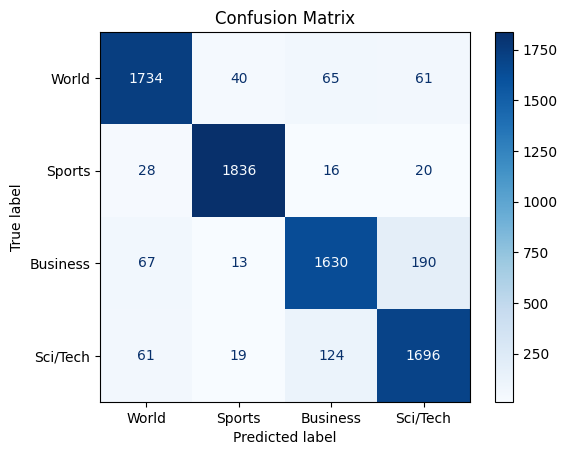

In [59]:
plot_confusion_matrix(rnn_model, test_loader)